In [1]:
# Auto-install missing packages
import sys
import subprocess

def install_and_import(package, import_name=None):
    try:
        if import_name:
            __import__(import_name)
        else:
            __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [2]:
# Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
file_path = "C:/Users/Aleena Mary Abraham/OneDrive/Desktop/SCMA632_2025/DATA/Survey.csv"
df = pd.read_csv(file_path)

In [4]:
# Select interval scale variables
sur_int = df.iloc[:, 19:46]

In [5]:
# Optional: scale the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [6]:
wcss = []
silhouette_scores = []

K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=123, n_init=25)
    kmeans.fit(sur_int_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(sur_int_scaled, kmeans.labels_))

C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: User

In [7]:
# KMeans clustering with k=4 (or use n_clusters from gap statistic)
kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)
kmeans_labels = kmeans.fit_predict(sur_int_scaled)

C:\Users\Aleena Mary Abraham\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
# Add cluster labels to the original DataFrame
df['Cluster_KMeans'] = kmeans_labels

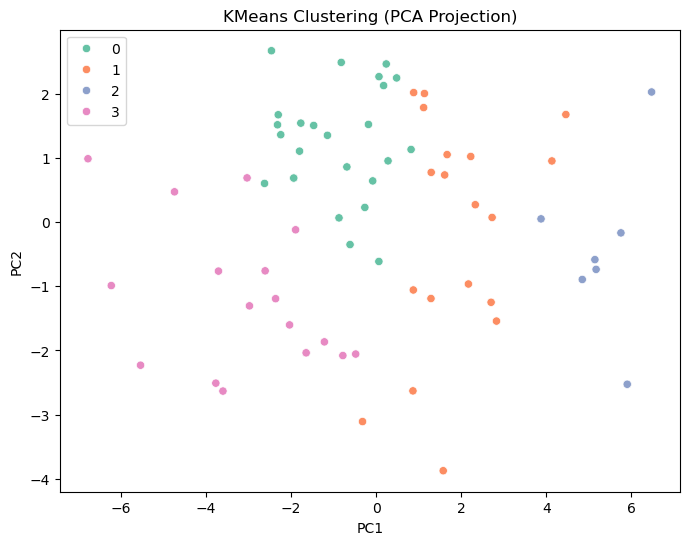

In [9]:
# Visualize clusters using first 2 PCA components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(sur_int_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=kmeans_labels, palette='Set2')
plt.title('KMeans Clustering (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

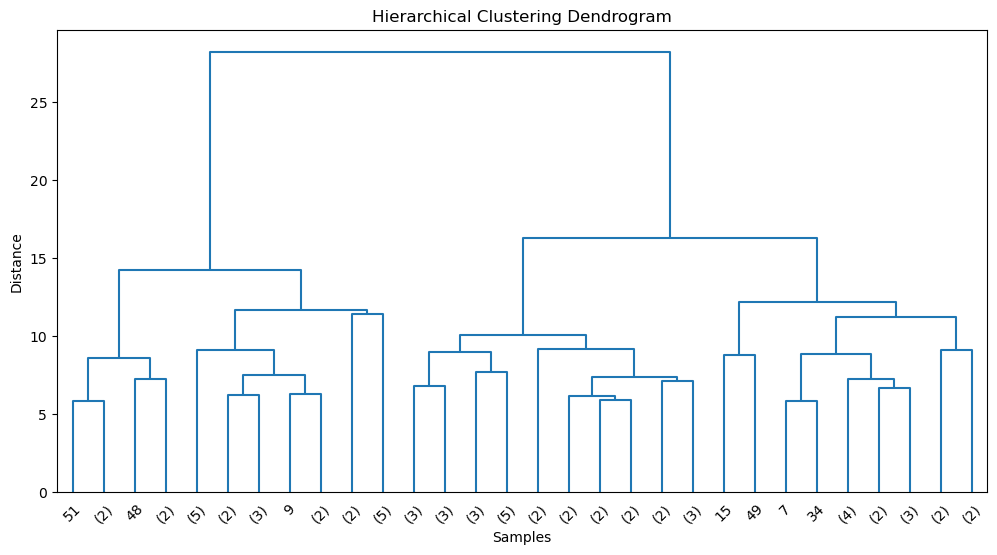

In [10]:
# Hierarchical clustering using Ward’s method
linked = linkage(sur_int_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10., color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [11]:
# Assign clusters (k=4)
df['Cluster_HC'] = fcluster(linked, t=4, criterion='maxclust')

In [12]:
# Reorder columns by cluster membership
from sklearn.utils import Bunch

cluster_order = pd.DataFrame(sur_int_scaled.T)
cluster_order.columns = [f'Respondent_{i+1}' for i in range(cluster_order.shape[1])]
cluster_labels = df['Cluster_KMeans']

In [13]:
# Transpose data: now rows = variables, columns = respondents
transposed = pd.DataFrame(sur_int_scaled.T, index=sur_int.columns)

In [14]:
# Create color labels for 70 respondents based on their cluster
cluster_labels = pd.Series(kmeans_labels, name="Cluster")

In [15]:
# Map clusters to colors
cluster_palette = sns.color_palette("Set2", 4)
cluster_color_map = dict(zip(range(4), cluster_palette))
col_colors = cluster_labels.map(cluster_color_map)

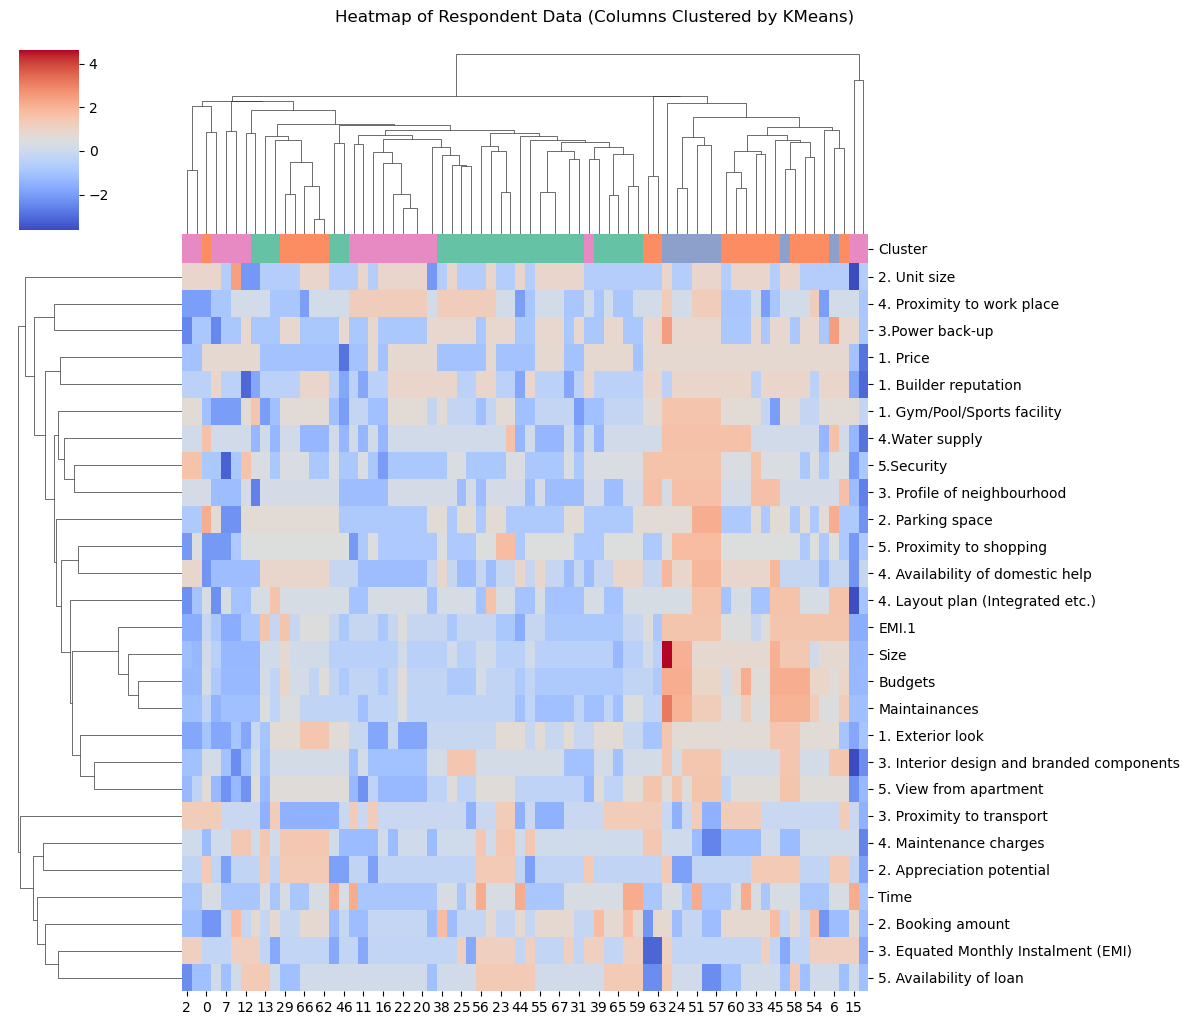

In [16]:
# Plot heatmap
sns.clustermap(transposed,
               col_cluster=True,
               row_cluster=True,
               col_colors=col_colors,
               cmap='coolwarm',
               figsize=(12, 10))
plt.suptitle("Heatmap of Respondent Data (Columns Clustered by KMeans)", y=1.02)
plt.show()